# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

60417.093000000285


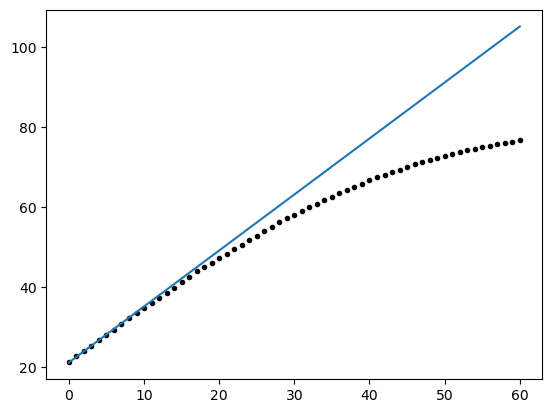

In [35]:
import numpy as np
import matplotlib.pyplot as plt
m_maatbeker = 820.8e-3 #kg
m_start = 1292.9e-3 #kg
m_eind = 1274.9e-3 #kg
c = 4.18e3 #J/kg * C
start_temp =21.1
m_water = m_start - m_maatbeker


def temp_model(t):
    T = (t*Q_per_min) / (m_water * c) + start_temp
    return T

#data inladen
data = np.loadtxt("tempmetingen.csv", delimiter=';', skiprows=1)
tijd = data[:,0]
temp = data[:,1]

Q_per_min = m_water * c * (temp[1]-temp[0])
Q_model = (temp_model(tijd)[len(tijd)-1]-start_temp)* m_water*c
Q_meting = (temp[len(tijd)-1]-start_temp)* (m_eind - m_maatbeker)*c
Q_verschil = Q_model - Q_meting

print(Q_verschil)

#grafiek plotten
plt.figure()
plt.plot(tijd, temp, 'k.')
plt.plot(tijd, temp_model(tijd))
plt.show()